In [27]:
import rosbag
import random
from cv_bridge import CvBridge, CvBridgeError

bridge=CvBridge()

disps=[]
bag = rosbag.Bag('disparity_and_raw.bag')
for topic, msg, t in bag.read_messages(topics=['/disparity']): #, '/right/image_raw']): 
    if random.randint(1,10)==6: #sample 1 image from every 10 .more or less
        disps.append(bridge.imgmsg_to_cv2(msg.image, "32FC1"))
bag.close()


In [87]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(wim)

0.107067108154


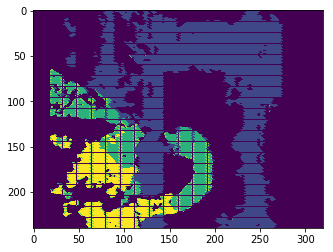

In [170]:
Z = gray.reshape((-1,3))

Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
t0=time.time()
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((gray.shape))
print(time.time()-t0)
plt.imshow(res2)
plt.show()

In [131]:
res2[100,2]

211

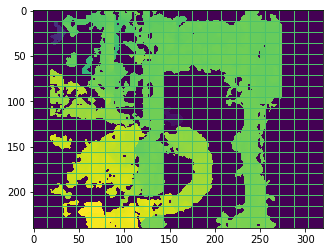

In [342]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
wim2=disps[50]
wim=disps[56]
plt.imshow(wim)
plt.show()

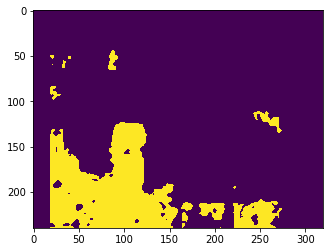

In [346]:
 _,thresh1 = cv2.threshold(np.array(wim2),15,18,cv2.THRESH_BINARY)
plt.imshow(thresh1)

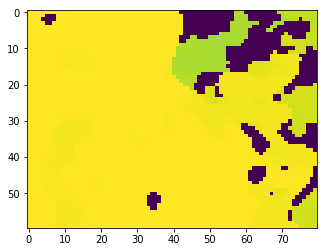

In [367]:
#split this thing into a 4x4 matrix and give us the biggest slut of them all
a=[]
for i in np.split(wim2,4,0):
    a.append(np.mean(i))
b=[]
for i in np.split(np.split(wim2,4,0)[np.argmax(a)],4,1):
    b.append(np.mean(i))
plt.imshow(np.split(np.split(wim2,4,0)[np.argmax(a)],4,1)[np.argmax(b)])

In [358]:
np.max(wim)

18.0

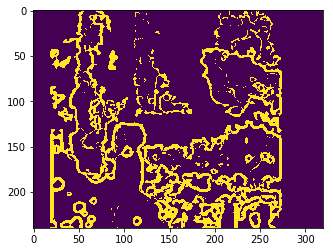

In [336]:
th3 = cv2.adaptiveThreshold(gray,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,0)
plt.imshow(th3)

In [266]:
aa[x[:,0],x[:,1]]

array([ 18.,  18.,  18., ...,  18.,  18.,  18.], dtype=float32)

In [246]:
np.unique(wim2)

array([-46.    ,  -0.4375,  -0.25  ,  -0.125 ,  -0.0625,   0.    ,
         0.0625,   0.125 ,   0.1875,   0.25  ,   0.3125,   0.375 ,
         0.4375,   0.5   ,   0.5625,   0.625 ,   0.6875,   0.75  ,
         0.8125,   0.875 ,   0.9375,   1.    ,   1.0625,   1.125 ,
         1.1875,   1.25  ,   1.3125,   1.375 ,   1.4375,   1.5   ,
         1.5625,   1.625 ,   1.6875,   1.75  ,   1.8125,   1.875 ,
         1.9375,   2.    ,   2.0625,   2.125 ,   2.1875,   2.25  ,
         2.3125,   2.375 ,   2.4375,   2.5   ,   2.5625,   2.625 ,
         2.6875,   2.75  ,   2.8125,   2.875 ,   2.9375,   3.    ,
         3.0625,   3.125 ,   3.1875,   3.25  ,   3.3125,   3.375 ,
         3.4375,   3.5   ,   3.5625,   3.625 ,   3.6875,   3.75  ,
         3.8125,   3.875 ,   3.9375,   4.    ,   4.0625,   4.125 ,
         4.1875,   4.25  ,   4.3125,   4.375 ,   4.4375,   4.5   ,
         4.5625,   4.625 ,   4.6875,   4.75  ,   4.8125,   4.875 ,
         4.9375,   5.    ,   5.0625,   5.125 ,   5.1875,   5.2

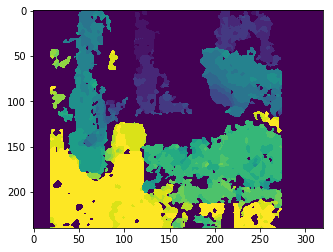

In [293]:
import os
cv2.imwrite("temp.png",wim2)

gray = cv2.cvtColor(cv2.imread("temp.png"), cv2.COLOR_BGR2GRAY)
#os.remove("temp.png")
plt.imshow(gray)

[[  58.57726779  216.11237099]
 [  92.74756081   56.48948743]
 [ 173.66490988  272.59555181]]


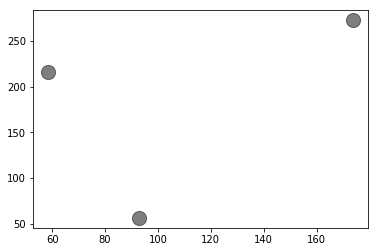

In [300]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

centers = kmeans.cluster_centers_
print(centers)
#plt.scatter(x[:,1],x[:,0])
plt.scatter(centers[:, 0], centers[:, 1]
            , c='black', s=200, alpha=0.5)
plt.show()
#plt.imshow(kmeans.transform(gray))

In [182]:
np.unique(gray)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=uint8)

In [42]:
np.savez(open("disps_list.np","wb+"),np.array(disps))

In [76]:

imgheight=disps[56].shape[0]
imgwidth=disps[56].shape[1]
thing=np.zeros((imgheight,12,16))
y1 = 0
M = imgheight//2
N = imgwidth//2
import time
t0=time.time()
for y in range(0,imgheight,M):
    for x in range(0, imgwidth, N):
        y1 = y + M
        x1 = x + N
        #tiles = disps[56][y:y+M,x:x+N]
        #cv2.rectangle(disps[56], (x, y), (x1, y1), (0, 255, 0))
        #cv2.imwrite("save/" + str(x) + '_' + str(y)+".png",tiles)

In [83]:
wim=disps[56]
wim.shape

(240, 320)

In [41]:

"""
f: 654.425170898
T: 0.0299420766532
valid_window: 
  x_offset: 20
  y_offset: 2
  height: 4294967291
  width: 4294967230
  do_rectify: False
min_disparity: -45.0
max_disparity: 18.0
delta_d: 0.0625
    
     height: 240
  width: 320
  encoding: "32FC1"
  """

'\nf: 654.425170898\nT: 0.0299420766532\nvalid_window: \n  x_offset: 20\n  y_offset: 2\n  height: 4294967291\n  width: 4294967230\n  do_rectify: False\nmin_disparity: -45.0\nmax_disparity: 18.0\ndelta_d: 0.0625\n    \n     height: 240\n  width: 320\n  encoding: "32FC1"\n  '